## This code will plot the run time for each methods

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("runtime_compare.csv")

# Create the subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Define the x-axis values as the "Methods" column
x_values = df["Method"]

# Define the y-axis values as the mean of the "runtime" column (across replicates)
y_values = df.iloc[:, 1:].mean(axis=1)

# Define the error bars as the standard deviation of the "runtime" column (across replicates)
y_errors = df.iloc[:, 1:].std(axis=1)

# Plot the data as a dot plot
ax.errorbar(x_values, y_values, yerr=y_errors, fmt='o', capsize=5)

# Customize the plot
ax.set_xlabel("Method")
ax.set_ylabel("Runtime")
ax.set_title("Runtime Comparison")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(x_values, rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()

/home/oneai/envs/EnDecon_GPU_New/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator


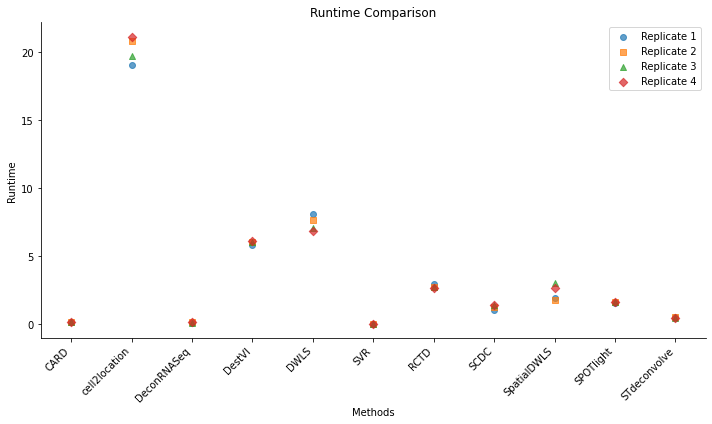

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("runtime_compare.csv")

# Create the subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Get the number of replicates
num_replicates = df.shape[1] - 1

# Define the markers for each replicate
markers = ['o', 's', '^', 'D']

# Plot each observation from replicates as separate dots
for i in range(num_replicates):
    # Define the x-axis values as the "Methods" column for each replicate
    x_values = df["Method"]

    # Define the y-axis values as the observation for the current replicate
    y_values = df.iloc[:, i + 1]

    # Plot the data as a scatter plot with unique markers
    ax.scatter(x_values, y_values, marker=markers[i], label=f"Replicate {i + 1}", alpha=0.7)

# Customize the plot
ax.set_xlabel("Methods")
ax.set_ylabel("Runtime")
ax.set_title("Runtime Comparison")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(x_values, rotation=45, ha="right")

# Add a legend for the replicates
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

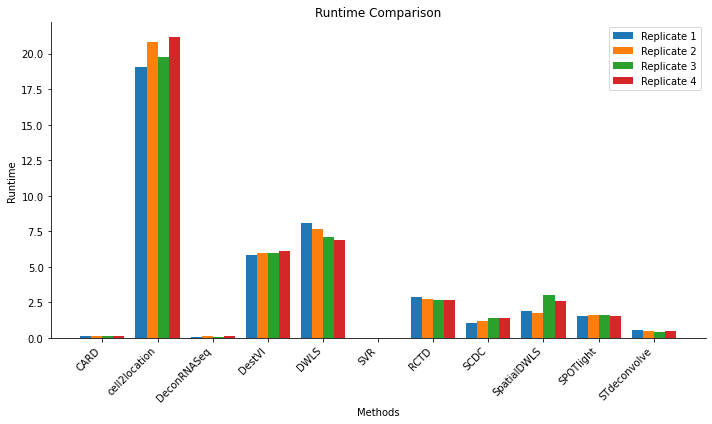

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file into a DataFrame
df = pd.read_csv("runtime_compare.csv")

# Create the subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Get the number of replicates
num_replicates = df.shape[1] - 1

# Define the width of each bar
bar_width = 0.2

# Define the x-axis positions for each group of bars (Methods)
x_positions = np.arange(len(df))

# Plot each observation from replicates as separate bars
for i in range(num_replicates):
    # Define the y-axis values as the observation for the current replicate
    y_values = df.iloc[:, i + 1]
    
    # Shift the x positions for each replicate's bars to avoid overlap
    shift = (i - (num_replicates - 1) / 2) * bar_width
    
    # Plot the data as bars
    ax.bar(x_positions + shift, y_values, width=bar_width, label=f"Replicate {i + 1}")

# Customize the plot
ax.set_xlabel("Methods")
ax.set_ylabel("Runtime")
ax.set_title("Runtime Comparison")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the x-axis ticks and labels to the method names
ax.set_xticks(x_positions)
ax.set_xticklabels(df["Method"], rotation=45, ha="right")

# Add a legend for the replicates
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

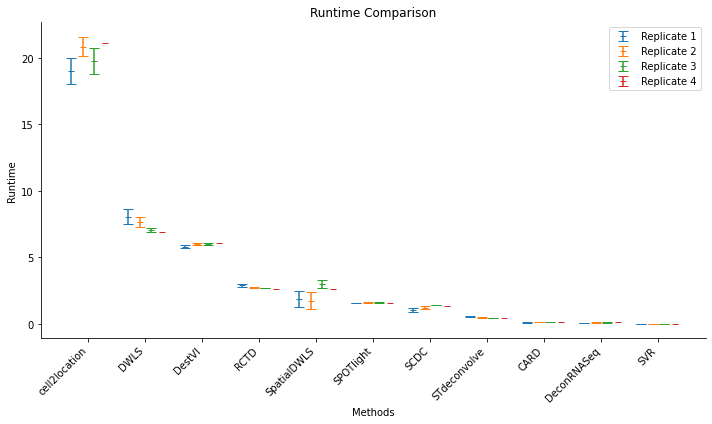

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file into a DataFrame
df = pd.read_csv("runtime_compare.csv")

# Calculate the average value for each method across observations
average_values = df.iloc[:, 1:].mean(axis=1)

# Sort the DataFrame by the average values in descending order
df_sorted = df.iloc[average_values.sort_values(ascending=False).index]

# Create the subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Get the number of replicates
num_replicates = df_sorted.shape[1] - 1

# Define the width of each bar
bar_width = 0.2

# Define the x-axis positions for each group of bars (Methods)
x_positions = np.arange(len(df_sorted))

# Plot only the top line (error bar caps) for each observation from replicates as separate bars
for i in range(num_replicates):
    # Define the y-axis values as the observation for the current replicate
    y_values = df_sorted.iloc[:, i + 1]
    
    # Shift the x positions for each replicate's bars to avoid overlap
    shift = (i - (num_replicates - 1) / 2) * bar_width
    
    # Plot the data as error bar caps (only top lines)
    ax.errorbar(x_positions + shift, y_values, yerr=df_sorted.iloc[:, i + 1:].std(axis=1), fmt='_', capsize=5, label=f"Replicate {i + 1}")

# Customize the plot
ax.set_xlabel("Methods")
ax.set_ylabel("Runtime")
ax.set_title("Runtime Comparison")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the x-axis ticks and labels to the sorted method names
ax.set_xticks(x_positions)
ax.set_xticklabels(df_sorted["Method"], rotation=45, ha="right")

# Add a legend for the replicates
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()